In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Descriptive analysis of NKOM Nettfart mobile app data

In [3]:
def import_mobdata(data_path):
    #import
    df = pd.read_csv(data_path, delimiter=';')
    
    #set and sort time indecies
    df.index = pd.to_datetime(df.tid)
    df = df.sort_index()
    df= df.drop('tid', axis=1)
    
    #get the data from 2018 to 2021 (inculsive)
    #df = df.loc['2018':'2021']
    return df

DATA_PATH = '../datasets/nettfart-mobile/nettfart_mobile2.csv'
mob_data = import_mobdata(DATA_PATH)

In [4]:
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740055 entries, 2017-01-06 06:46:00 to 2022-12-01 23:59:00
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   hastighet_ned          740055 non-null  float64
 1   hastighet_opp          740055 non-null  float64
 2   lengdegrad             740055 non-null  object 
 3   breddegrad             740055 non-null  float64
 4   klient_type            740055 non-null  object 
 5   teknologi              739428 non-null  object 
 6   ip_as_name             735881 non-null  object 
 7   nettverkstype          740055 non-null  int64  
 8   landkode               735917 non-null  object 
 9   land_geoip             740054 non-null  object 
 10  tilbyder               188880 non-null  object 
 11  enhets_platform        740055 non-null  object 
 12  enhets_os              740055 non-null  object 
 13  enhet                  740055 non-null  object 
 14  en

In [5]:
mob_data['tilbyder'].head(20)

tid
2017-01-06 06:46:00               NaN
2017-01-06 07:13:00               NaN
2017-01-06 07:15:00               NaN
2017-01-06 07:15:00               NaN
2017-01-06 07:33:00    Telia Norge AS
2017-01-06 07:35:00    Telia Norge AS
2017-01-06 07:35:00    Telia Norge AS
2017-01-06 07:48:00               NaN
2017-01-06 10:56:00               NaN
2017-01-06 10:57:00    Telia Norge AS
2017-01-06 10:57:00               NaN
2017-01-06 10:58:00    Telia Norge AS
2017-01-06 10:59:00               NaN
2017-01-06 11:04:00    Telia Norge AS
2017-01-06 11:08:00    Telia Norge AS
2017-01-06 11:10:00               NaN
2017-01-06 11:12:00               NaN
2017-01-06 11:42:00    Telia Norge AS
2017-01-06 11:45:00    Telia Norge AS
2017-01-06 11:49:00               NaN
Name: tilbyder, dtype: object

### Looks for excess featuers

Above is Mobile Country Codes (MCC) and Mobile Network Codes (MNC). 


In [6]:
mob_data[['operator_name','sim_operator_name', 'public_ip_as_name','ip_as_name' ,'tilbyder' , 'teknologi','nettverkstype']].head(20)

,operator_name,sim_operator_name,public_ip_as_name,ip_as_name,tilbyder,teknologi,nettverkstype
tid,,,,,,,
2017-01-06 06:46:00,TRUE-H,TRUE-H,"REALMOVE-AS-AP Realmove Company Limited, TH","REALMOVE-AS-AP Realmove Company Limited, TH",NaN,4G,13
2017-01-06 07:13:00,NaN,NaN,"TDC TDC A/S, DK","TDC TDC A/S, DK",NaN,WLAN,99
2017-01-06 07:15:00,Telenor,Telenor,"TELENOR-NEXTEL Telenor Norge AS, NO","TELENOR-NEXTEL Telenor Norge AS, NO",NaN,4G,13
2017-01-06 07:15:00,NaN,NaN,"TDC TDC A/S, DK","TDC TDC A/S, DK",NaN,WLAN,99
2017-01-06 07:33:00,Telia N,Telia N,"NETCOM-AS Oslo, Norway, NO","NETCOM-AS Oslo, Norway, NO",Telia Norge AS,4G,13
2017-01-06 07:35:00,Telia N,Telia N,"NETCOM-AS Oslo, Norway, NO","NETCOM-AS Oslo, Norway, NO",Telia Norge AS,4G,13
2017-01-06 07:35:00,Telia N,Telia N,"NETCOM-AS Oslo, Norway, NO","NETCOM-AS Oslo, Norway, NO",Telia Norge AS,4G,13
2017-01-06 07:48:00,NaN,NaN,"SIOL-NET Formerly SiOL Internet d.o.o., SI","SIOL-NET Formerly SiOL Internet d.o.o., SI",NaN,WLAN,99
2017-01-06 10:56:00,NaN,NaN,"TDC TDC A/S, DK","TDC TDC A/S, DK",NaN,WLAN,99


In [7]:
mob_data[['enhet','enhets_modell', 'enhets_platform','enhets_os']].tail(20)

,enhet,enhets_modell,enhets_platform,enhets_os
tid,,,,
2022-12-01 22:43:00,iPhone,"iPhone10,4",iOS,13.01.2001
2022-12-01 22:43:00,iPhone,"iPhone13,4",iOS,14.jun
2022-12-01 22:46:00,iPhone,"iPhone10,1",iOS,15.jan
2022-12-01 22:47:00,iPhone,"iPhone8,4",iOS,14.07.2001
2022-12-01 22:52:00,Nord,AC2003,Android,11(2112031546)
2022-12-01 22:52:00,Nord,AC2003,Android,11(2112031546)
2022-12-01 22:55:00,iPhone,"iPhone14,2",iOS,15.feb
2022-12-01 23:09:00,iPhone,"iPhone11,2",iOS,15.feb
2022-12-01 23:13:00,a10,SM-A105FN,Android,10(A105FNXXU6BUC3)


In [8]:
mob_data['nettverkstype'].value_counts()

99     639102
13      95476
41       1497
15       1459
2        1017
8         673
106       454
20        113
3         102
10         93
9          48
107        10
18          6
1           3
19          1
6           1
Name: nettverkstype, dtype: int64

In [9]:
mob_data['teknologi'].value_counts()

WLAN    639101
4G       95476
3G        2375
5G        1455
2G        1021
Name: teknologi, dtype: int64

In [10]:
mob_data[mob_data.public_ip_as_name != mob_data.ip_as_name][['public_ip_as_name', 'ip_as_name']]

,public_ip_as_name,ip_as_name
tid,,
2017-01-07 20:42:00,NaN,NaN
2017-01-11 09:07:00,NaN,NaN
2017-01-11 09:29:00,NaN,NaN
2017-01-11 09:38:00,NaN,NaN
2017-01-11 09:39:00,NaN,NaN
...,...,...
2022-03-02 19:21:00,NaN,NaN
2022-04-02 13:18:00,NaN,NaN
2022-04-02 19:25:00,NaN,NaN


In [11]:
mob_data[mob_data.sim_operator_name == mob_data.operator_name][['sim_operator_name', 'operator_name']]

,sim_operator_name,operator_name
tid,,
2017-01-06 06:46:00,TRUE-H,TRUE-H
2017-01-06 07:15:00,Telenor,Telenor
2017-01-06 07:33:00,Telia N,Telia N
2017-01-06 07:35:00,Telia N,Telia N
2017-01-06 07:35:00,Telia N,Telia N
...,...,...
2022-12-01 22:24:00,Telia N,Telia N
2022-12-01 23:13:00,vodafone ES | Telenor,vodafone ES | Telenor
2022-12-01 23:27:00,Telia N,Telia N


In [12]:
mob_data[mob_data.landkode != mob_data.land_geoip][['landkode', 'land_geoip']]

,landkode,land_geoip
tid,,
2017-01-06 07:13:00,DK,NO
2017-01-06 07:15:00,DK,NO
2017-01-06 10:56:00,DK,NO
2017-01-06 10:59:00,DK,NO
2017-01-06 11:10:00,DK,NO
...,...,...
2022-12-01 19:52:00,NO,SE
2022-12-01 21:58:00,NO,BE
2022-12-01 23:14:00,NO,US


In [13]:
mob_data['klient_type'].value_counts()

MOBILE    740055
Name: klient_type, dtype: int64

In [14]:
# removes excess features
mob_data = mob_data.drop(columns=['klient_type', 'land_geoip', 'operator_name', 'ip_as_name', 'nettverkstype'])

### Only use measurement tagged with Norway

In [15]:
mob_data = mob_data[mob_data['landkode']=='NO']

mob_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700847 entries, 2017-01-06 07:15:00 to 2022-12-01 23:59:00
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   hastighet_ned          700847 non-null  float64
 1   hastighet_opp          700847 non-null  float64
 2   lengdegrad             700847 non-null  object 
 3   breddegrad             700847 non-null  float64
 4   teknologi              700233 non-null  object 
 5   landkode               700847 non-null  object 
 6   tilbyder               188835 non-null  object 
 7   enhets_platform        700847 non-null  object 
 8   enhets_os              700847 non-null  object 
 9   enhet                  700847 non-null  object 
 10  enhets_modell          700847 non-null  object 
 11  sim_operator           96834 non-null   object 
 12  sim_operator_name      96823 non-null   object 
 13  nat_type               700847 non-null  object 
 14  pu

In [16]:
# what is common nat_type

mob_data['nat_type'].value_counts()

nat_local_to_public_ipv4     504682
no_nat_ipv6                  150889
nat_public_to_public_ipv4     41358
no_nat_ipv4                    2487
nat_public_to_public_ipv6      1313
nat_local_to_public_ipv6        118
Name: nat_type, dtype: int64

In [17]:
mob_data[mob_data.teknologi == '4G']['nat_type'].value_counts()

no_nat_ipv6                  47224
nat_public_to_public_ipv4    35912
nat_local_to_public_ipv4      7434
no_nat_ipv4                   1556
nat_public_to_public_ipv6      241
nat_local_to_public_ipv6        40
Name: nat_type, dtype: int64

In [18]:
mob_data[mob_data.teknologi == 'WLAN']['nat_type'].value_counts()

nat_local_to_public_ipv4     496425
no_nat_ipv6                  101621
nat_public_to_public_ipv4      3336
nat_public_to_public_ipv6      1059
no_nat_ipv4                     743
nat_local_to_public_ipv6         65
Name: nat_type, dtype: int64

In [19]:
mob_data['tilbyder'].value_counts()

Telenor Norge AS    134778
Telia Norge AS       54057
Name: tilbyder, dtype: int64

In [20]:
mob_data[mob_data.teknologi == '4G']['tilbyder'].value_counts()

Telia Norge AS      32506
Telenor Norge AS     6219
Name: tilbyder, dtype: int64

In [21]:
mob_data[mob_data.teknologi == 'WLAN']['tilbyder'].value_counts()

Telenor Norge AS    128010
Telia Norge AS       19730
Name: tilbyder, dtype: int64

In [22]:
mob_data[mob_data.teknologi == '4G']['sim_operator_name'].value_counts()

Telenor                  39479
Telia N                  26723
N Telenor                 3943
TELENOR                   2496
Talkmore                  1713
                         ...  
YOIGO | Telia N              1
Movistar | NetCom            1
WIND GR  | Fjordkraft        1
NL KPN | TELENOR             1
Telekom.de | Talkmore        1
Name: sim_operator_name, Length: 262, dtype: int64

In [23]:
mob_data[mob_data.teknologi == 'WLAN']['sim_operator_name'].value_counts()

Telenor                  55
Telia N                  48
N Telenor                18
TELENOR                   8
ice+                      8
Chess                     6
One Call                  5
Dipper                    5
ice - Telia               4
Fjordkraft                4
ice                       3
Chilimobil                3
Talkmore                  3
ice pluss                 2
SAGA MOBIL                1
vodafone ES | Telenor     1
ice +                     1
Hudya                     1
Telipol                   1
ice.net                   1
OneCall                   1
MyCall                    1
Nortel                    1
vodafone ES               1
Talkmore Bedrift          1
Name: sim_operator_name, dtype: int64

sim operator present mostly for when measurment is done with mobile network technology. 

In [24]:
mob_data= mob_data.dropna(axis=0, subset=['teknologi'])
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 700233 entries, 2017-01-06 07:15:00 to 2022-12-01 23:59:00
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   hastighet_ned          700233 non-null  float64
 1   hastighet_opp          700233 non-null  float64
 2   lengdegrad             700233 non-null  object 
 3   breddegrad             700233 non-null  float64
 4   teknologi              700233 non-null  object 
 5   landkode               700233 non-null  object 
 6   tilbyder               188750 non-null  object 
 7   enhets_platform        700233 non-null  object 
 8   enhets_os              700233 non-null  object 
 9   enhet                  700233 non-null  object 
 10  enhets_modell          700233 non-null  object 
 11  sim_operator           96683 non-null   object 
 12  sim_operator_name      96672 non-null   object 
 13  nat_type               700233 non-null  object 
 14  pu

<AxesSubplot:xlabel='teknologi', ylabel='Count'>

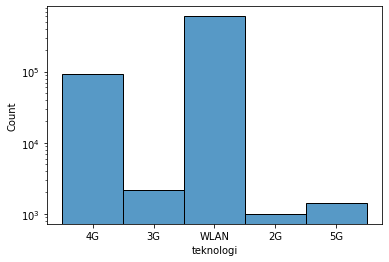

In [25]:
sns.histplot(data=mob_data.reset_index(), x="teknologi", log_scale=(False, True))

In [26]:
mob_data['teknologi'].value_counts()

WLAN    603249
4G       92407
3G        2137
5G        1442
2G         998
Name: teknologi, dtype: int64

# Visualization


## Distingushing metrics in access technology

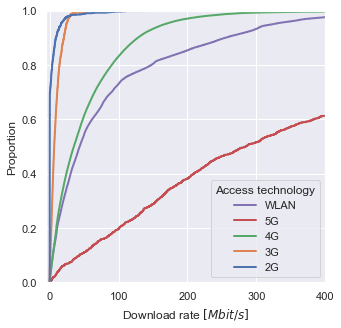

In [27]:
mob_data = mob_data.reset_index()

sns.set_theme(style="darkgrid")
order=["2G", "3G", "4G", "5G", "WLAN"]
fig, ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(
    mob_data,
    x="hastighet_ned", hue="teknologi", 
    linewidth=2,
    ax=ax,
    legend=False,
    hue_order = order
    
)
ax.set_xlim(-5, 400)
ax.set_xlabel("Download rate $[Mbit/s]$")
ax.legend(title="Access technology", labels = order[::-1])
#plt.savefig('figs/tech/tech_down_ecdf')
plt.show()

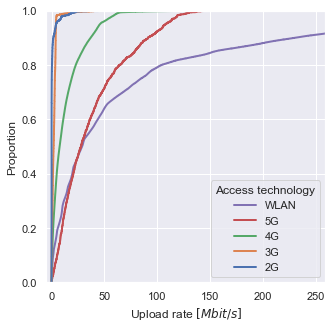

In [28]:
sns.set_theme(style="darkgrid")
order=["2G", "3G", "4G", "5G", "WLAN"]
fig, ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(
    mob_data,
    x="hastighet_opp", hue="teknologi", 
    linewidth=2,
    ax=ax,
    legend=False,
    hue_order = order
    
)
ax.set_xlim(-5, 259)
ax.set_xlabel("Upload rate $[Mbit/s]$")
ax.legend(title="Access technology", labels = order[::-1])
#plt.savefig('figs/tech/tech_up_ecdf')

plt.show()


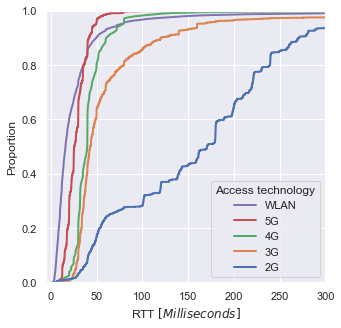

In [29]:
sns.set_theme(style="darkgrid")
order=["2G", "3G", "4G", "5G", "WLAN"]
fig, ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(
    mob_data,
    x="ping_median", hue="teknologi", 
    linewidth=2,
    ax=ax,
    legend=False,
    hue_order = order
    
)
ax.set_xlim(-5, 300)
ax.set_xlabel("RTT $[Milliseconds]$")
ax.legend(title="Access technology", labels = order[::-1])
#plt.savefig('figs/tech/tech_RTT_ecdf')

plt.show()

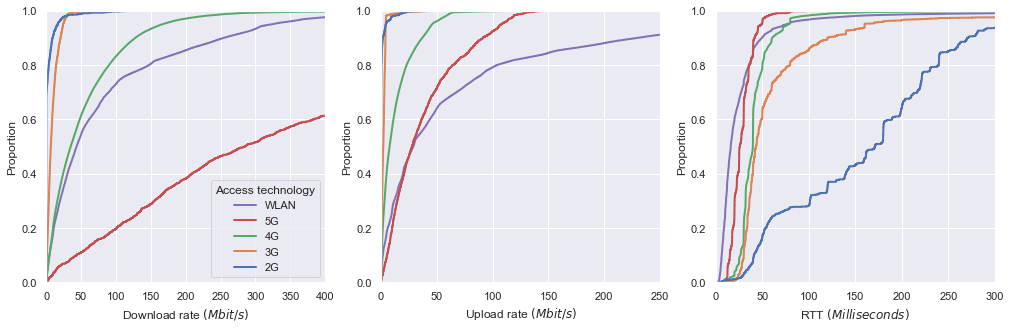

In [30]:
sns.set_theme(style="darkgrid")

order=["2G", "3G", "4G", "5G", "WLAN"]
fig, ax = plt.subplots(ncols = 3, figsize=(17,5))
sns.color_palette("rocket")

sns.ecdfplot(
    mob_data,
    x="hastighet_ned", hue="teknologi", 
    linewidth=2,
    ax=ax[0],
    legend=False,
    hue_order = order
    
)
sns.ecdfplot(
    mob_data,
    x="hastighet_opp", hue="teknologi", 
    linewidth=2,
    ax=ax[1], legend=False,
    hue_order = order

)
sns.ecdfplot(
    mob_data,
    x="ping_median", hue="teknologi", 
    linewidth=2,
    ax=ax[2],
    legend= False,
    hue_order = order

)

ax[0].set_xlim(0, 400)
ax[0].set_xlabel("Download rate $(Mbit/s)$")
ax[0].legend(title="Access technology", labels = order[::-1])



ax[1].set_xlim(0, 250)
ax[1].set_xlabel("Upload rate $(Mbit/s)$")

ax[2].set_xlim(0, 300)
ax[2].set_xlabel("RTT $(Milliseconds)$")
#plt.savefig("eCDF mobdata")
plt.show()

## Temporal 

In [31]:
mob_data['year']= mob_data['tid'].dt.year
W_4G_df = mob_data[(mob_data['teknologi'] == '4G') | (mob_data['teknologi'] == 'WLAN')]
mob_data['year'].value_counts()

2020    220299
2021    174718
2019    169524
2018     97543
2022     20170
2017     17979
Name: year, dtype: int64

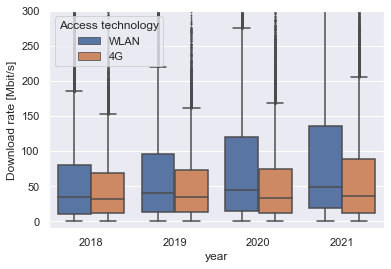

In [32]:
fig, ax = plt.subplots()
sns.boxplot(x="year", y="hastighet_ned",
            hue="teknologi", whis=1.5, fliersize=1,
            data=W_4G_df[W_4G_df.year.isin([2018,2019,2020,2021])], ax=ax)

ax.set_ylim(-10, 300)
ax.set_ylabel("Download rate [Mbit/s]")
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles,["WLAN", "4G"],title="Access technology",loc="upper left")
#plt.savefig('figs/tech/tech_down_box')
plt.show()


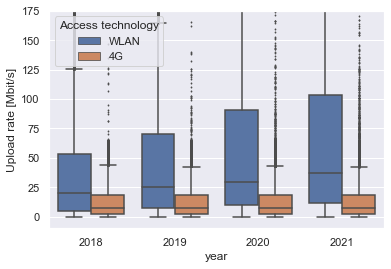

In [33]:
fig, ax = plt.subplots()
sns.boxplot(x="year", y="hastighet_opp",
            hue="teknologi", whis=1.5, fliersize=1,
            data=W_4G_df[W_4G_df.year.isin([2018,2019,2020,2021])], ax=ax)

ax.set_ylim(-10, 175)
ax.set_ylabel("Upload rate [Mbit/s]")
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles,["WLAN", "4G"],title="Access technology",loc="upper left")
#plt.savefig('figs/tech/tech_up_box')

plt.show()

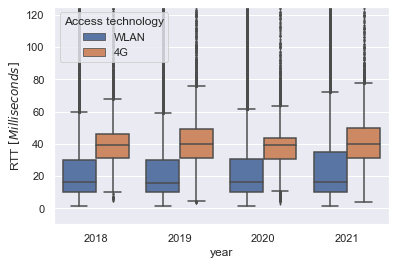

In [34]:
fig, ax = plt.subplots()
sns.boxplot(x="year", y="ping_median",
            hue="teknologi", whis=1.5, fliersize=1,
            data=W_4G_df[W_4G_df.year.isin([2018,2019,2020,2021])], ax=ax)

ax.set_ylim(-10, 125)
ax.set_ylabel("RTT $[Milliseconds]$")
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles,["WLAN", "4G"],title="Access technology",loc="upper left")
#plt.savefig('figs/tech/tech_RTT_box')

plt.show()

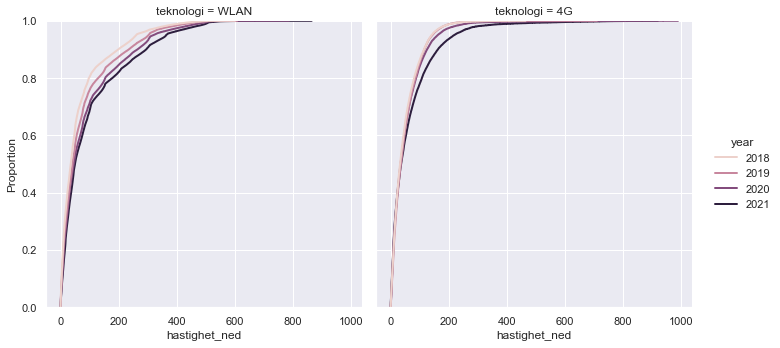

In [35]:
sns.displot(
    W_4G_df[W_4G_df.year.isin([2018,2019,2020,2021])], kind='ecdf',
    x="hastighet_ned", hue="year", col="teknologi",
    linewidth=2,
)


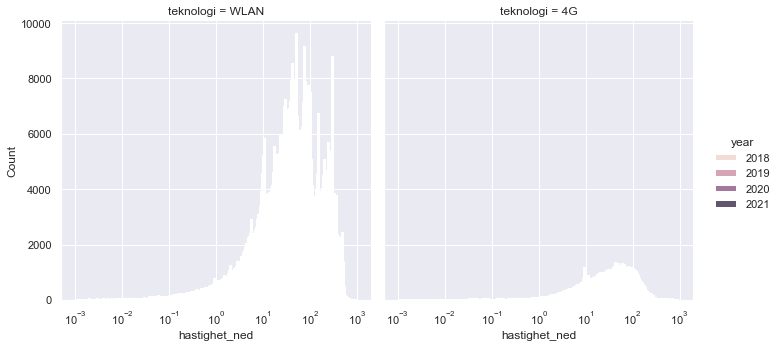

In [36]:
sns.displot(
    W_4G_df[W_4G_df.year.isin([2018,2019,2020,2021])], kind='hist',
    x="hastighet_ned", col="teknologi", hue= 'year', multiple='stack',
    linewidth=2, log_scale=True
)

## day of week

In [37]:
four_g = W_4G_df[W_4G_df.teknologi =='4G']
day_of_week_4G= four_g.groupby(four_g['tid'].dt.dayofweek)['hastighet_ned'].count()

In [38]:
wlan_df = W_4G_df[W_4G_df.teknologi =='WLAN']
day_of_week_wlan = wlan_df.groupby(wlan_df['tid'].dt.dayofweek)['hastighet_ned'].count()


<BarContainer object of 7 artists>

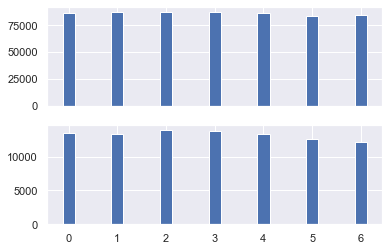

In [39]:
fig , ax = plt.subplots(nrows=2, sharex=True)
barWidth = 0.25
ax[0].bar(day_of_week_wlan.index,day_of_week_wlan.values ,width=barWidth)
ax[1].bar(day_of_week_4G.index, day_of_week_4G.values, width=barWidth)

<AxesSubplot:xlabel='tid'>

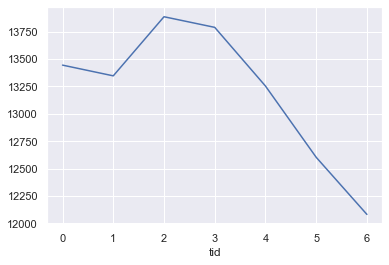

In [40]:
day_of_week_4G.plot(kind='line')

<AxesSubplot:xlabel='tid'>

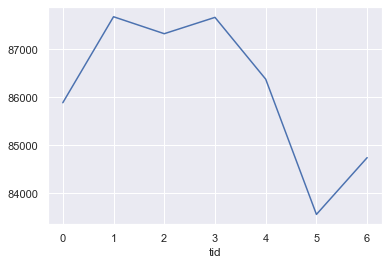

In [41]:
day_of_week_wlan.plot(kind='line')

## Hour of day

In [42]:
hour_of_day_wlan = wlan_df.groupby(wlan_df['tid'].dt.hour)['hastighet_ned'].count()
hour_of_day_4g = four_g.groupby(four_g['tid'].dt.hour)['hastighet_ned'].count()


Text(0, 0.5, 'Num measurements')

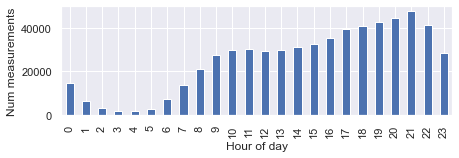

In [43]:
fig, ax= plt.subplots( figsize=(7, 2))
hour_of_day_wlan.plot(kind='bar', ax=ax)
ax.set_xlabel("Hour of day")
ax.set_ylabel("Num measurements")
#plt.savefig("figs/tech/hour_day_wlan")

Text(0, 0.5, 'Num measurements')

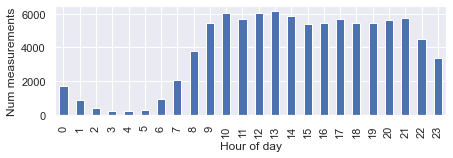

In [44]:
fig, ax= plt.subplots( figsize=(7, 2))
hour_of_day_4g.plot(kind='bar', ax=ax)
ax.set_xlabel("Hour of day")
ax.set_ylabel("Num measurements")
#plt.savefig("figs/tech/hour_day_4g")

# Distinguish on operarator mobile infrastructure: 4G

In [45]:
mob_data[mob_data.teknologi == '4G']['sim_operator_name'].value_counts().head(20)


Telenor           39479
Telia N           26723
N Telenor          3943
TELENOR            2496
Talkmore           1713
One Call           1693
Ice Norway         1648
OneCall            1554
ice+               1544
Chilimobil         1481
ice pluss          1056
ice.net            1016
ice                1013
Carrier            1007
Fjordkraft          678
Chess               575
Telipol             375
NetCom              297
Dipper              279
Komplett Mobil      242
Name: sim_operator_name, dtype: int64

Need to map all mobile subscription provider to the mobile broadband network they use. 
https://mobiltelefoni.no/slik-fungerer-mobilnettene-i-norge

In [46]:
telenor_users = ['Telenor','N Telenor', 'TELENOR', 'Talkmore', 'Fjordkraft']
telia_users = ['Telia N','One Call', 'OneCall', 'Chilimobil']
ice_users =['Ice Norway', 'ice+', 'ice pluss', 'ice.net', 'ice']

Ice leier også nett av telia der de ikke har bygd ut 4G 

https://www.ice.no/ice-magasinet/norges-nye-mobilnett/

In [47]:
# get network based on row.
def get_network(row):
    if row in telenor_users:
        return 'Telenor'
    elif row in telia_users:
        return 'Telia'
    elif row in ice_users:
        return 'Ice'
    else:
        return np.nan
    
# map to new collumn
four_g['network'] = four_g['sim_operator_name'].copy().apply( lambda row: get_network(row))
four_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92407 entries, 0 to 700231
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tid                    92407 non-null  datetime64[ns]
 1   hastighet_ned          92407 non-null  float64       
 2   hastighet_opp          92407 non-null  float64       
 3   lengdegrad             92407 non-null  object        
 4   breddegrad             92407 non-null  float64       
 5   teknologi              92407 non-null  object        
 6   landkode               92407 non-null  object        
 7   tilbyder               38725 non-null  object        
 8   enhets_platform        92407 non-null  object        
 9   enhets_os              92407 non-null  object        
 10  enhet                  92407 non-null  object        
 11  enhets_modell          92407 non-null  object        
 12  sim_operator           91944 non-null  object        
 13  

/Users/jesper/master/master_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


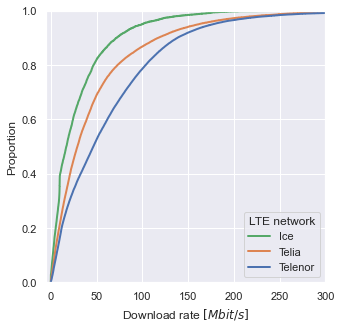

In [48]:
order = ['Telenor', 'Telia', 'Ice']
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(
    four_g,
    x="hastighet_ned", hue="network", 
    linewidth=2,
    ax=ax,
    legend=False,
    hue_order= order,
    
)
ax.set_xlim(-5, 300)
ax.set_xlabel("Download rate $[Mbit/s]$")
ax.legend(title="LTE network", labels = order[::-1])
#plt.savefig('figs/4g/isp_down_ecdf')
plt.show()

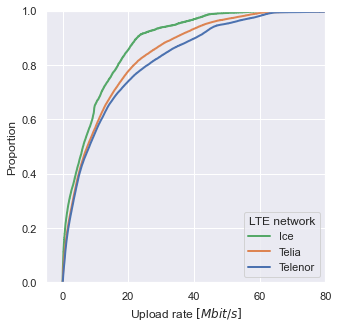

In [49]:
order = ['Telenor', 'Telia', 'Ice']
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(
    four_g,
    x="hastighet_opp", hue="network", 
    linewidth=2,
    ax=ax,
    legend=False,
    hue_order= order,
    
)
ax.set_xlim(-5, 80)
ax.set_xlabel("Upload rate $[Mbit/s]$")
ax.legend(title="LTE network", labels = order[::-1])
#plt.savefig('figs/4g/isp_up_ecdf')
plt.show()

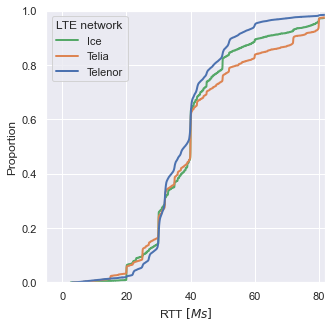

In [50]:
order = ['Telenor', 'Telia', 'Ice']
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
sns.ecdfplot(
    four_g,
    x="ping_median", hue="network", 
    linewidth=2,
    ax=ax,
    legend=False,
    hue_order= order,
    
)
ax.set_xlim(-5, 82)
ax.set_xlabel("RTT $[Ms]$")
ax.legend(title="LTE network", labels = order[::-1])
#plt.savefig('figs/4g/isp_rtt_ecdf')
plt.show()

In [51]:
four_g

,tid,hastighet_ned,hastighet_opp,lengdegrad,breddegrad,teknologi,landkode,tilbyder,enhets_platform,enhets_os,...,sim_operator,sim_operator_name,nat_type,public_ip_asn,public_ip_as_name,num_threads_requested,num_threads,ping_median,year,network
0,2017-01-06 07:15:00,32.339,33.130,8.103848034523525,58.180864,4G,NO,NaN,iOS,10.03.2003,...,242-01,Telenor,no_nat_ipv6,2119.0,"TELENOR-NEXTEL Telenor Norge AS, NO",3,3,30.464739,2017,Telenor
1,2017-01-06 07:33:00,35.984,9.993,7.159852640014172,58.045217,4G,NO,Telia Norge AS,iOS,10.02.2001,...,242-02,Telia N,nat_local_to_public_ipv4,12929.0,"NETCOM-AS Oslo, Norway, NO",3,3,30.028120,2017,Telia
2,2017-01-06 07:35:00,11.633,6.436,7.149743875495298,58.038875,4G,NO,Telia Norge AS,iOS,10.02.2001,...,242-02,Telia N,nat_local_to_public_ipv4,12929.0,"NETCOM-AS Oslo, Norway, NO",3,3,39.945953,2017,Telia
3,2017-01-06 07:35:00,14.367,6.846,7.149743875495298,58.038875,4G,NO,Telia Norge AS,iOS,10.02.2001,...,242-02,Telia N,nat_local_to_public_ipv4,12929.0,"NETCOM-AS Oslo, Norway, NO",3,3,39.921458,2017,Telia
4,2017-01-06 10:57:00,7.619,0.027,7.15483909123584,58.042191,4G,NO,Telia Norge AS,iOS,10.feb,...,242-05,OneCall,nat_local_to_public_ipv4,12929.0,"NETCOM-AS Oslo, Norway, NO",3,3,47.940809,2017,Telia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700196,2022-12-01 22:24:00,54.626,19.413,6.189212856188619,60.368527,4G,NO,NaN,iOS,15.01.2001,...,242-01,Telenor,no_nat_ipv6,2119.0,"TELENOR-NEXTEL Telenor Norge AS, NO",5,5,39.870808,2022,Telenor
700197,2022-12-01 22:24:00,45.810,0.907,10.0295651,62.719333,4G,NO,Telia Norge AS,Android,11(A202FXXU3CUJ2),...,242-02,Telia N,nat_public_to_public_ipv4,12929.0,"NETCOM-AS Oslo, Norway, NO",5,5,31.986259,2022,Telia
700221,2022-12-01 23:13:00,6.492,2.853,0.1284372,38.707681,4G,NO,Telenor Norge AS,Android,10(A105FNXXU6BUC3),...,242-01,vodafone ES | Telenor,nat_local_to_public_ipv4,2119.0,"TELENOR-NEXTEL Telenor Norge AS, NO",5,5,88.434749,2022,NaN
700230,2022-12-01 23:51:00,3.974,0.306,11.2662515,59.422983,4G,NO,NaN,Android,11(G780GXXU3AUJ2),...,242-01,Telenor,no_nat_ipv6,2119.0,"TELENOR-NEXTEL Telenor Norge AS, NO",5,5,60.087239,2022,Telenor
